### Generating random numbers with defined distribution

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(300464)

x_min = 0
x_max = 2


### Method of elimination


In [8]:

def f(x):
    return 5/12*(1 + (x - 1)**4)

def metoda_eliminacji(n,x_max,x_min, function):
    numbers = []
    x = np.arange(x_min, x_max, 0.01)
    f_min, f_max = np.min(function(x)), np.max(function(x))
    
    for _ in range(n):
        U1 = np.random.uniform(x_min,x_max)
        U2 = np.random.uniform(0,f_max)
        
        if U2 < f(U1):
            numbers.append(U1)
        
    print(f'{len(numbers)/n:.2f} of probes were selected')

    fig, axes= plt.subplots(figsize=(12,8))
    axes.plot(x, f(x), 'r--')
    axes.hist(numbers, density=1)
    axes.set_title("Histogram for "+str(n)+ " probes")
    plt.show()


0.61 of probes were selected


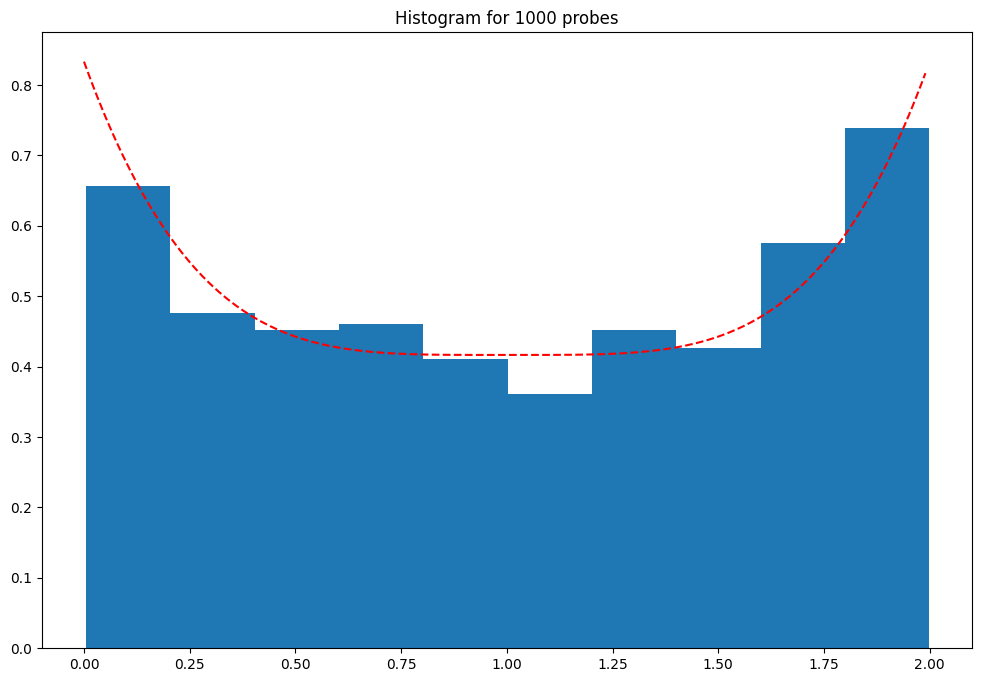

0.60 of probes were selected


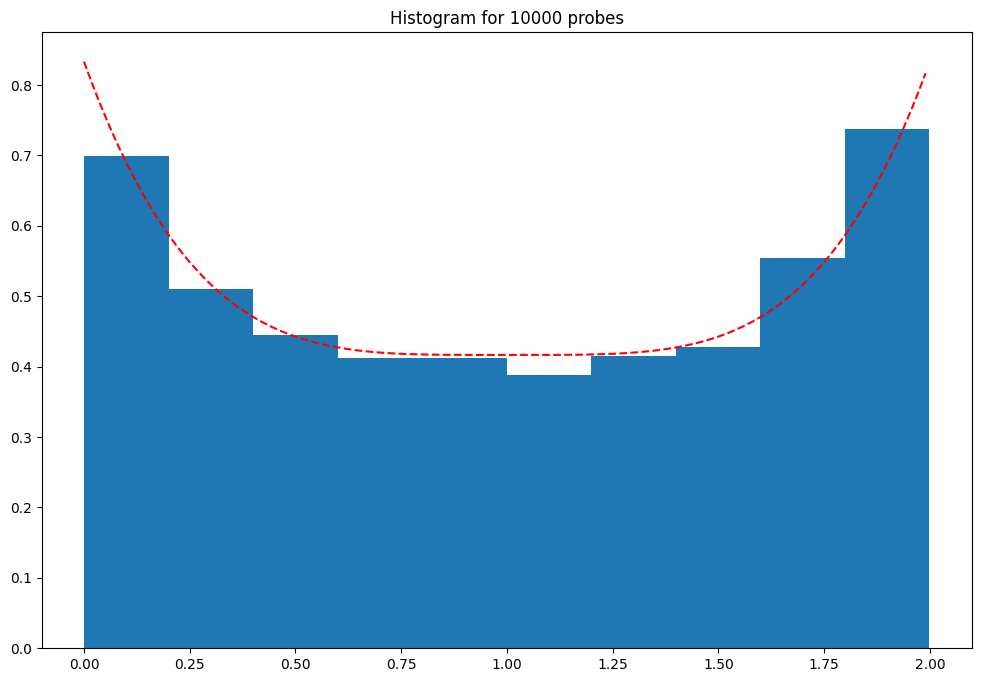

0.60 of probes were selected


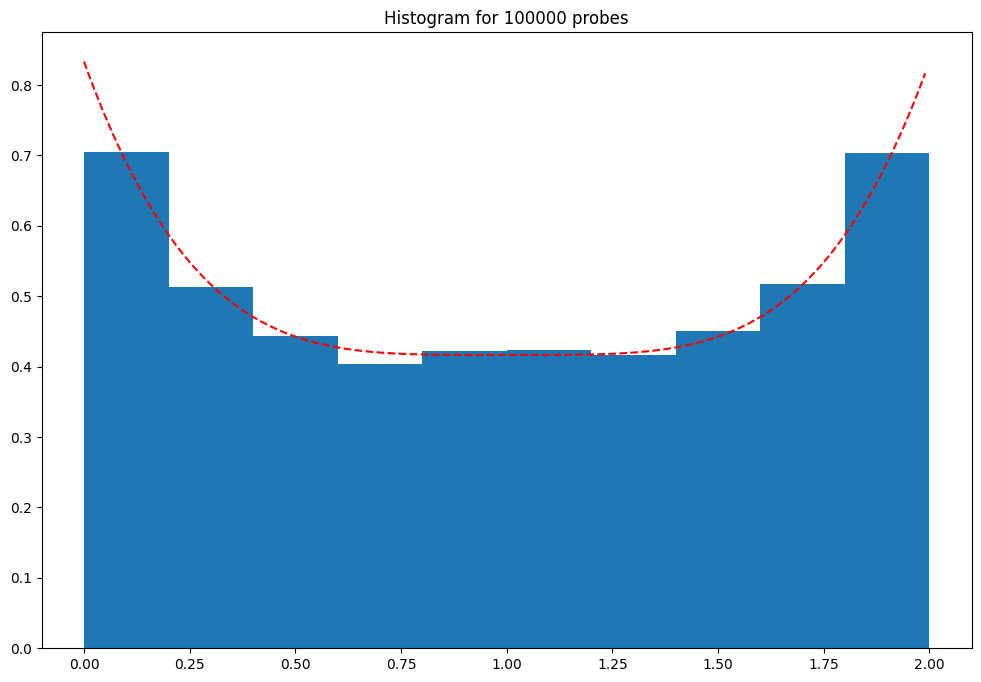

In [9]:
for N in [1000,10000,100000]:
    metoda_eliminacji(N, x_max=x_max, x_min=x_min, function=f)

This method enalbes us to correctly generate numbers from defined distribution but it has one problem: approximately 40% of generated numbers did not match the distribution so they were ignored. This is why this generator has low efficiency and it is little stupid.

To make it more accurate I should change for loop to while loop that would allow it to return number of probes exactly equal to what it should return. 

In [3]:
def f(x):
    return 5/12*(1 + (x - 1)**4)

def metoda_eliminacji(n,x_max,x_min, function):
    numbers = []
    x = np.arange(x_min, x_max, 0.01)
    f_min, f_max = np.min(function(x)), np.max(function(x))
    
    i=0
    while len(numbers) < n:
        U1 = np.random.uniform(x_min,x_max)
        U2 = np.random.uniform(0,f_max)
        
        if U2 < f(U1):
            numbers.append(U1)
        i += 1
        
    print(f'{i} numbers were generated and {n} were selected')
    print(f'{n/i:.2f} is estimaed efficiency')

    fig, axes= plt.subplots(figsize=(12,8))
    axes.plot(x, f(x), 'r--')
    axes.hist(numbers, density=1)
    axes.set_title("Histogram for "+str(n)+ " probes")
    plt.show()

0.58 of probes were selected


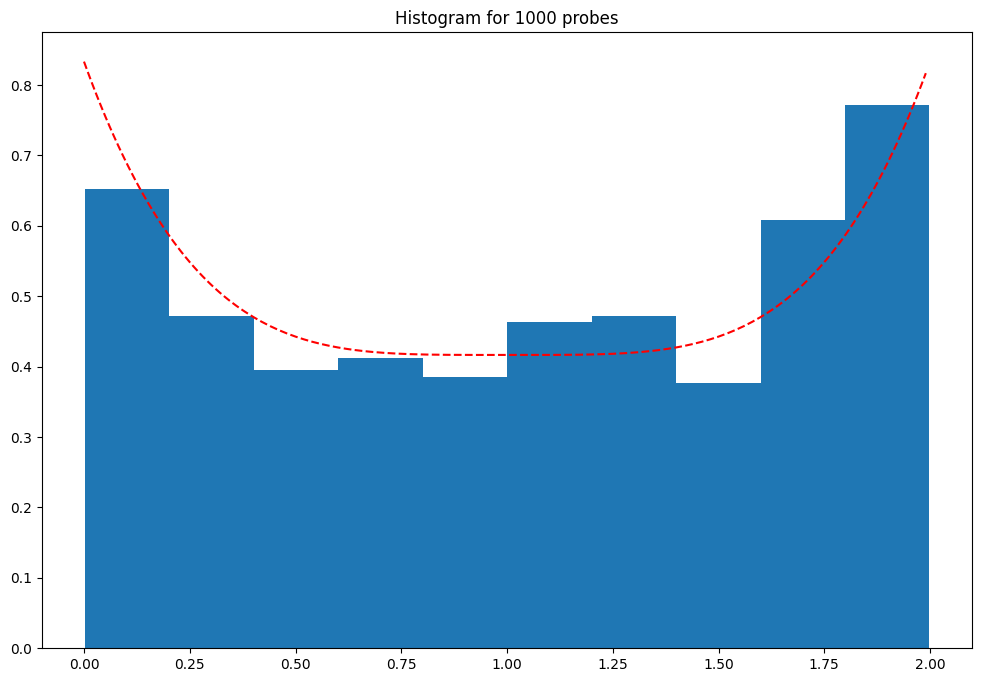

0.60 of probes were selected


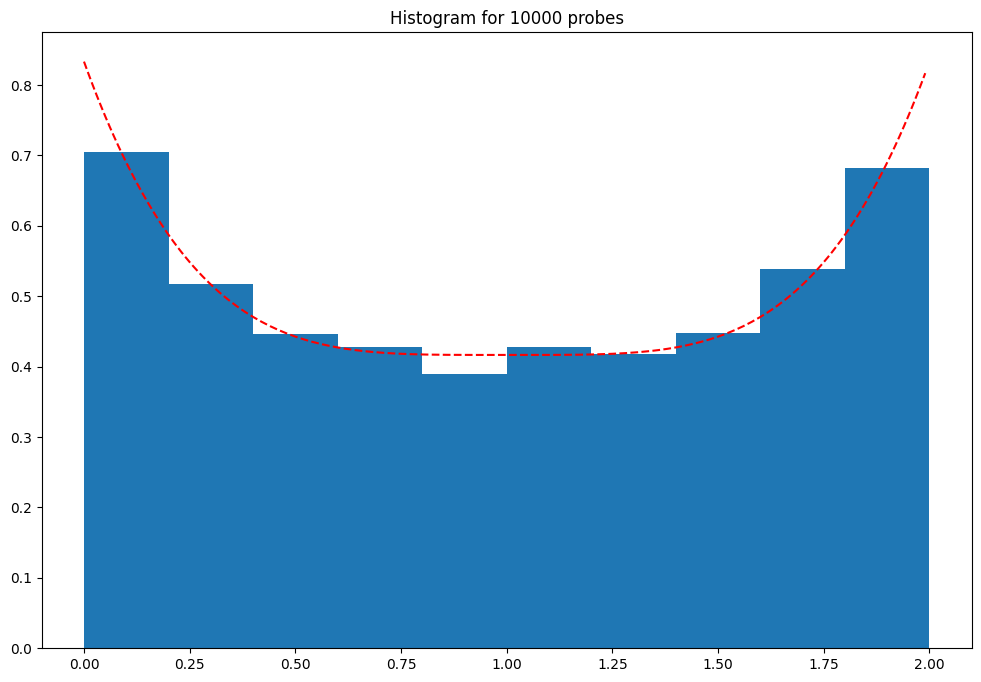

0.60 of probes were selected


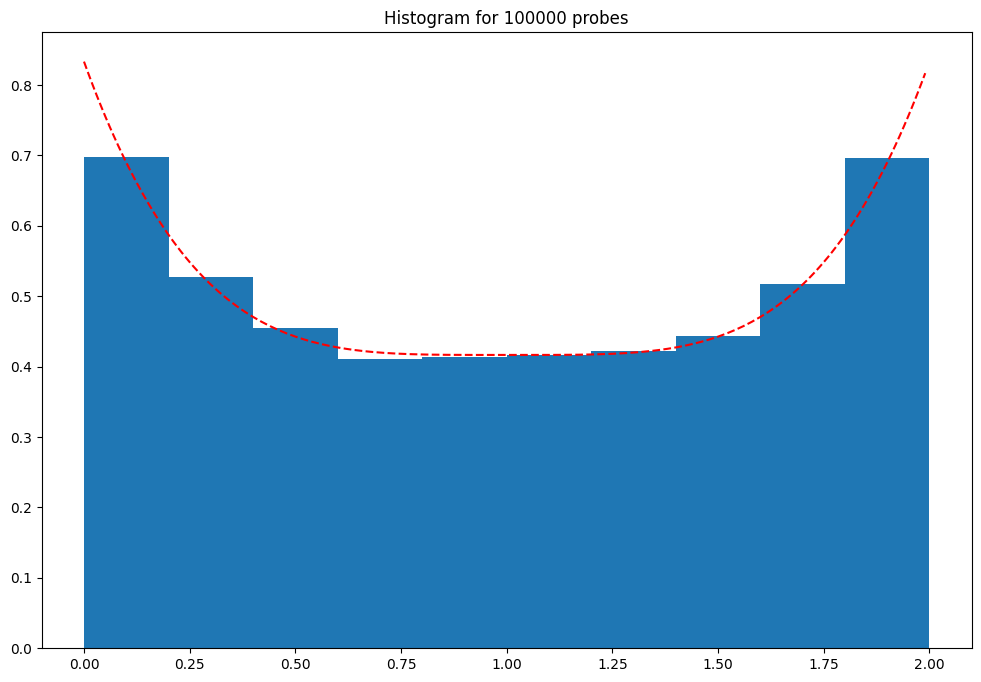

In [10]:
for N in [1000,10000,100000]:
    metoda_eliminacji(N, x_max=x_max, x_min=x_min, function=f)

### Method of superposition

In [26]:
def metoda_superpozycji(n,p1,p2,x_max,x_min):
    def g1(x): return 0.5
    def g2(x): return 5/2*(x-1)**4
    def f(x): return p1 * g1(x) + p2* g2(x)

    numbers = []
    
    x = np.arange(x_min, x_max, 0.01)
    for _ in range(n):
        U1 = np.random.uniform(x_min,x_max)
        U2 = np.random.uniform(0,1)
        if(U2 < p1):
            numbers.append(U1)
        else:
            if (U1 -1) >0:
                numbers.append(1+np.power((U1 - 1), 0.2))
            else:
                numbers.append(1 - np.power(abs(U1 -1), 0.2))

    fig, axes= plt.subplots(figsize=(12,8))
    axes.plot(x, f(x), 'r--')
    axes.hist(numbers, density=1)
    axes.set_title("Histogram for "+str(n)+ " probes")
    plt.show()

    

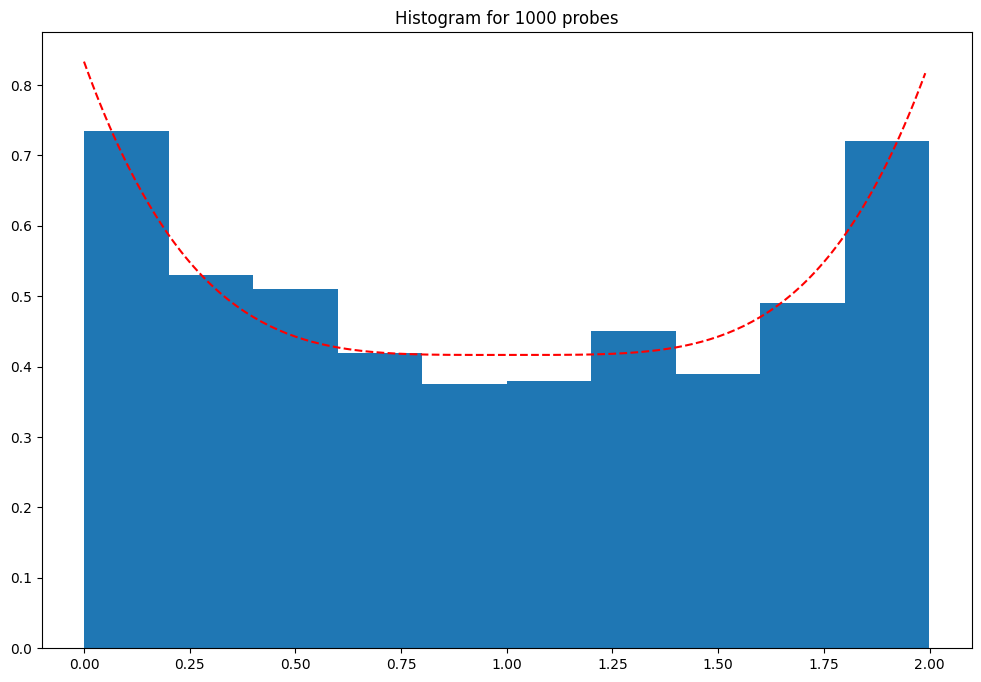

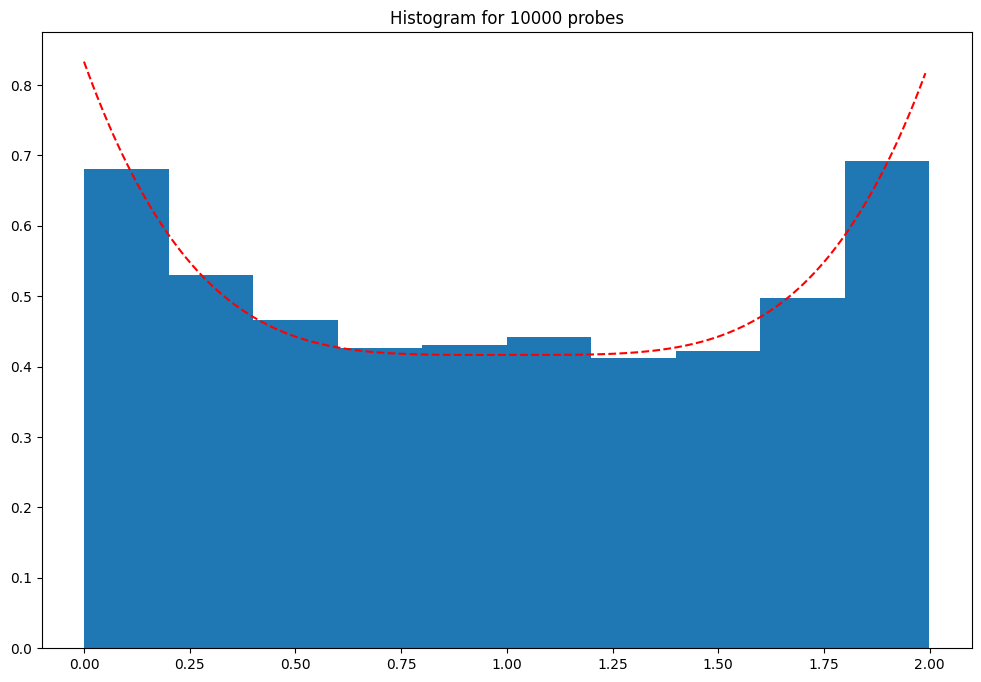

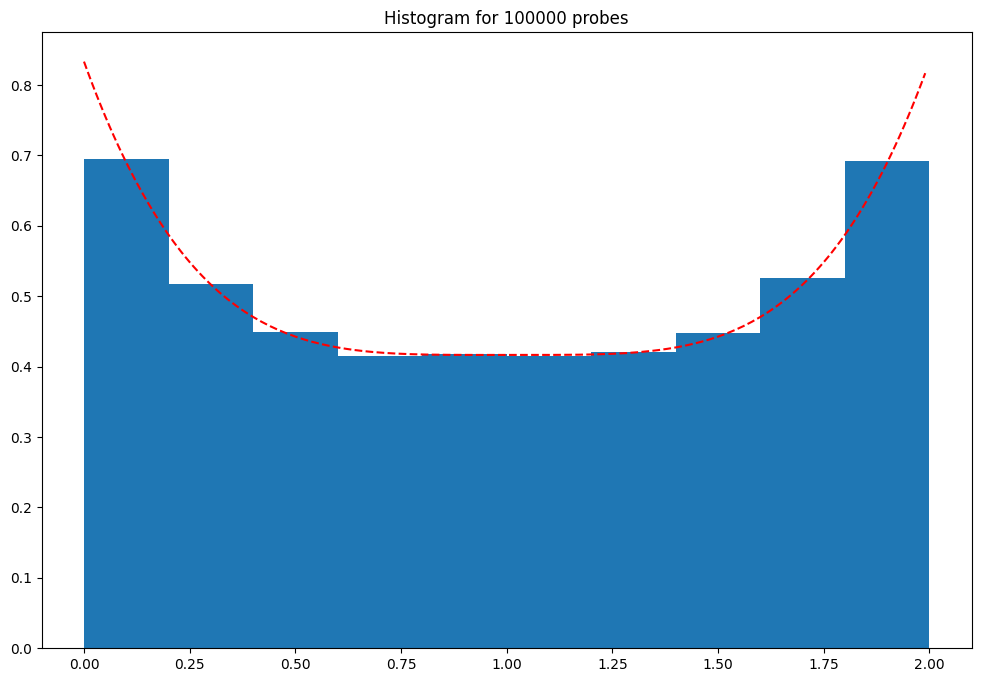

In [27]:
for N in [1000,10000,100000]:
    metoda_superpozycji(N,5/6,1/6, x_max=x_max, x_min=x_min)

This method is much better. It has 100% efficiency comparing to previous method. Its problem is that is difficlut to define those two functions and their weights.

0.94 of probes were selected


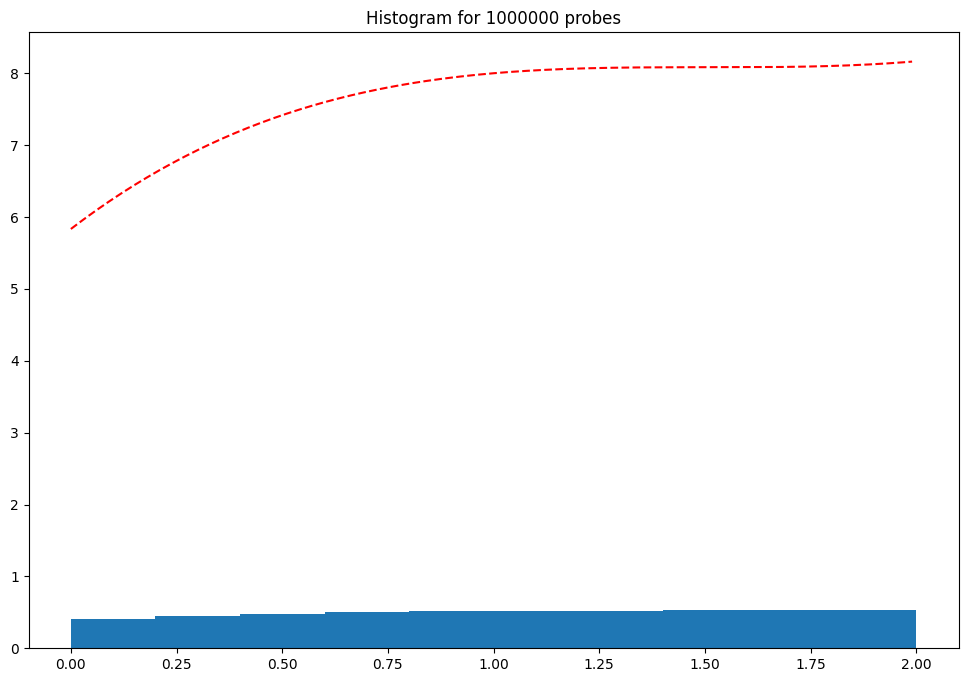

0.74 of probes were selected


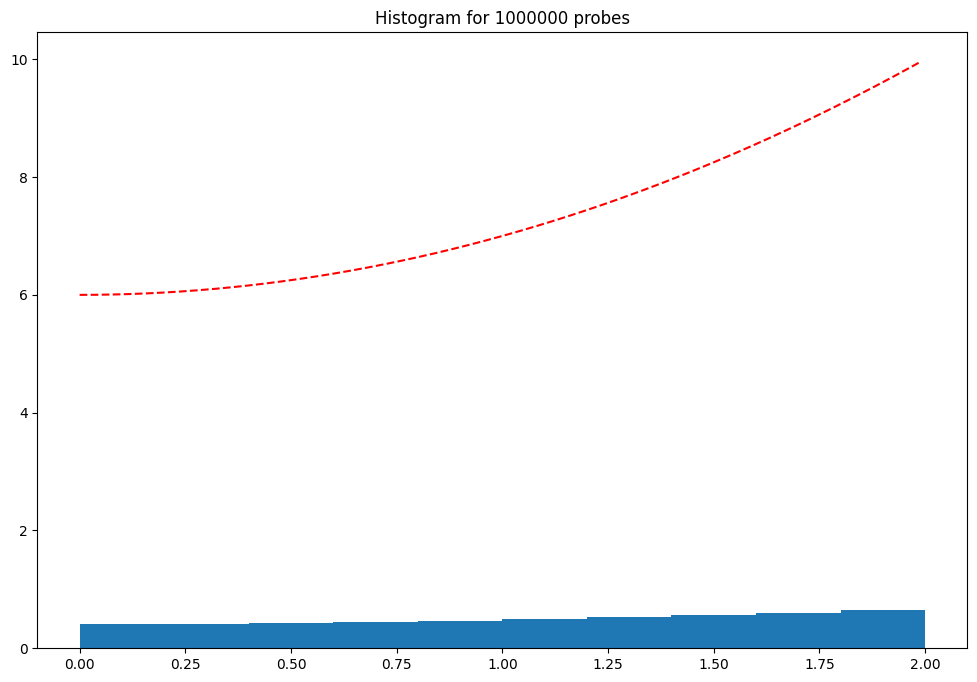

0.50 of probes were selected


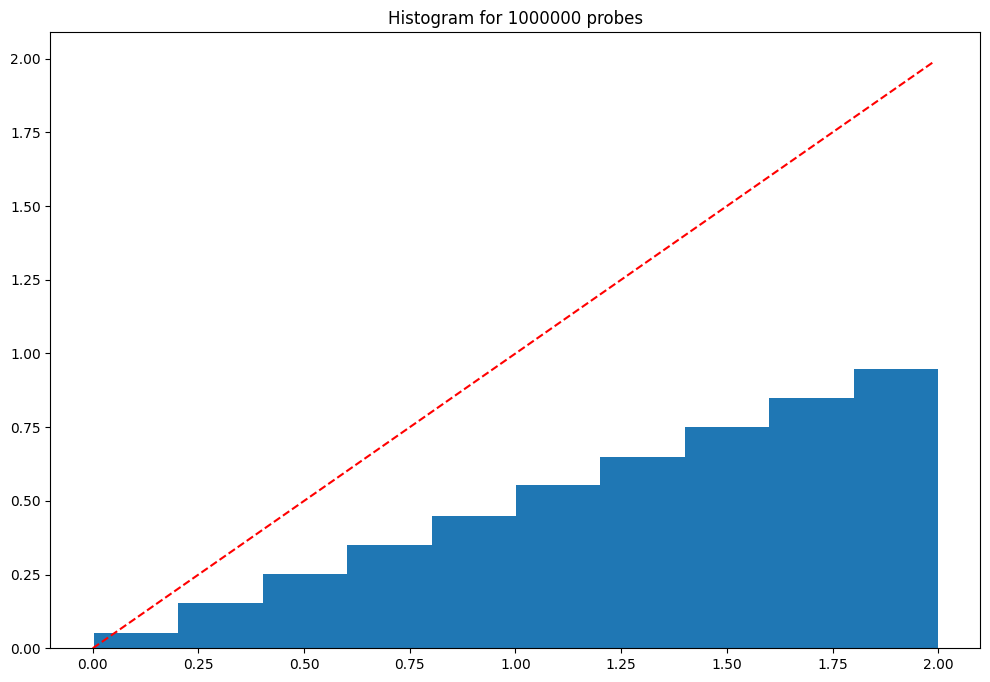

0.67 of probes were selected


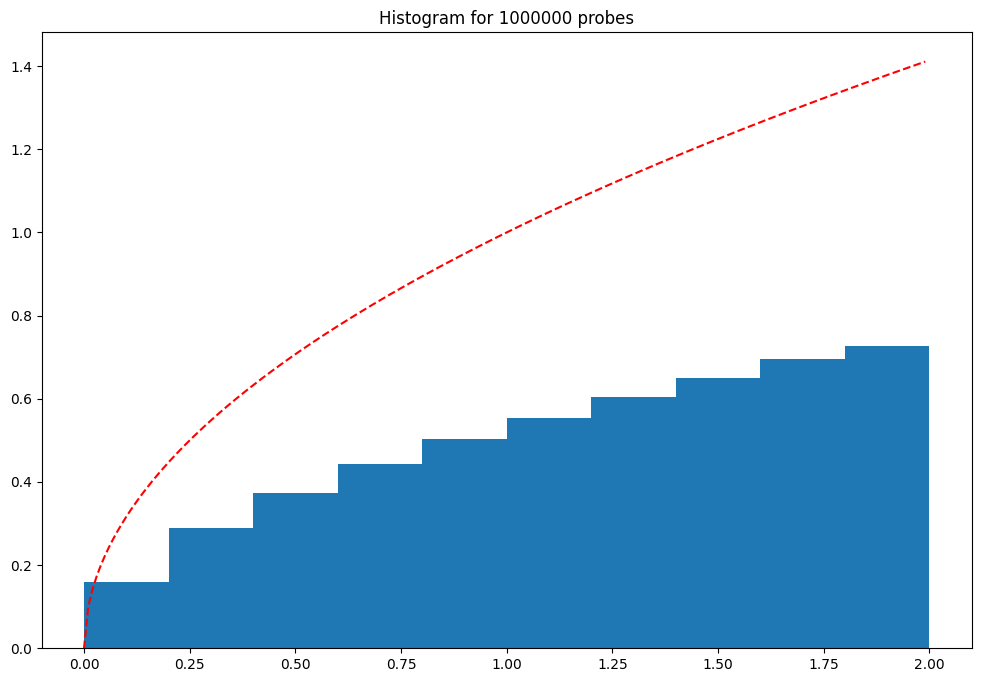

In [13]:
def f1(x):
    return 1/12*(1 + (2*x - 3)**3) + 8
def f2(x):
    return x**2 + 6
def f3(x):
    return np.abs(x)
def f4(x):
    return np.sqrt(x) 

for f in [f1,f2,f3,f4]:
    metoda_eliminacji(1000000, x_max=x_max, x_min=x_min, function=f)